# Задача

Заказчик: <br>
Благотворительный фонд “Бюро добрых дел”<br><br>

Основная цель заказчика заключается в том, чтобы из пула тех клиентов, которые жертвовали за последний год, выявить клиентов, которые могут увеличить частоту или размер пожертвований.<br>
* Данные, которыми располагает заказчик, включают в себя историю платежей жертвователей и какую-то дополнительную информацию за несколько лет по четырём тысячам жертвователей.<br>
* Жизненный цикл жертвователя составляет от полутора до трёх лет, поэтому в истории будут примеры того, как именно меняется характер платежей клиентов.<br>
* Если получится на основе данных сделать дополнительную сегментацию, например выделить характерное поведение пользователей, которые прекращают жертвовать, это также интересует заказчика.
<br><br>

Данные реальные, задача интересная, успешное её решение приведёт к тому, что больше людей получат ту помощь, в которой нуждаются.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
donors = pd.read_excel('Выгрузка для ЯП_2.xlsx', sheet_name='Доноры')
donats = pd.read_excel('Выгрузка для ЯП_2.xlsx', sheet_name='Пожертвования')

display(donors.head(10), donors.info())
display(donats.head(10), donats.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   ID                               3683 non-null   object        
 1   Пол                              2431 non-null   object        
 2   Город                            1015 non-null   object        
 3   Дата последней email активности  1835 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 115.2+ KB


,ID,Пол,Город,Дата последней email активности
0,AF575B85-917F-475D-8875-00055586E05B,NaN,NaN,NaT
1,229A9B43-3A15-4A48-8CB6-000EDB240D50,NaN,NaN,NaT
2,C6606486-05A8-4437-ACF9-00344E54FEE1,NaN,NaN,NaT
3,6ED86154-A688-4A11-868F-006209035413,Женский ...,NaN,NaT
4,46C41E20-EA56-4698-9C37-00692FD6FFE8,Женский ...,NaN,NaT
5,8CBFF8AB-3153-473A-BE84-0079B873EA33,Мужской ...,NaN,2022-07-18 17:36:39
6,20AC64AC-190E-4091-8D2E-00832BED87C5,Женский ...,NaN,2022-07-18 16:29:53
7,0E516427-6B84-4268-AB70-009E9E1FD026,NaN,NaN,NaT
8,3845EBA8-054E-465D-98CE-00A2758E3F92,NaN,NaN,NaT
9,530A44DC-46A2-48E6-962F-00A67997F7A1,Женский ...,NaN,2022-07-18 16:29:50


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14043 entries, 0 to 14042
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Donor ID            14043 non-null  object        
 1   Дата платежа        14043 non-null  datetime64[ns]
 2   Сумма платежа       14043 non-null  float64       
 3   Рекуррентный        14043 non-null  object        
 4   Назначение платежа  12774 non-null  object        
 5   Канал оплаты        14043 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 658.4+ KB


,Donor ID,Дата платежа,Сумма платежа,Рекуррентный,Назначение платежа,Канал оплаты
0,DE5393F9-9585-4057-B7FB-24B69697FC08,2022-07-03 19:49:48,300.0,Да ...,ПОЖЕРТВОВАНИЕ undefined,Банковские карты
1,81CD4BEF-443E-4D36-B34F-664E11182D65,2020-03-14 12:20:02,300.0,Нет ...,SMS bdd,SMS
2,D3BEB76D-D8B6-47E2-8109-44F1B278943B,2022-04-07 00:00:00,16.0,Нет ...,Добровольное пожертвование. НДС не облагается,Прямые поступления на счет
3,F1310736-B229-4AAC-99B7-F13ACECF67CB,2019-12-26 02:25:42,300.0,Нет ...,NaN,SMS
4,61C3D86B-39DA-445C-9D7F-9924CE9BDA14,2021-06-26 01:26:07,200.0,Да ...,ПОЖЕРТВОВАНИЕ undefined,Банковские карты
5,6FDEE73B-0270-4AFA-BA21-579E5B970D6A,2017-08-26 18:16:27,100.0,Да ...,Пожертвование в фонд помощи детям-отказникам и...,Банковские карты
6,F66CEFEF-38BB-4E7A-A795-207E19A03005,2017-06-28 14:15:06,2000.0,Да ...,Пожертвование в фонд помощи детям-отказникам и...,Банковские карты
7,C09905A1-2059-4FAB-B74B-F52B5913CF84,2020-06-01 14:43:58,200.0,Да ...,ПОЖЕРТВОВАНИЕ,Банковские карты
8,BBA4E944-A48D-44B8-A0E6-E4FEB6486097,2021-12-07 17:32:21,500.0,Да ...,ПОЖЕРТВОВАНИЕ undefined,Банковские карты
9,08C3988B-C0FF-44EE-83BF-5A75E18110D2,2019-11-05 20:59:40,100.0,Да ...,ПОЖЕРТВОВАНИЕ undefined,Банковские карты


None

In [3]:
# сравним количество уникальных id в обеих датасетах
display(len(donors['ID'].unique()))
len(donats['Donor ID'].unique())

3683

3683

In [4]:
# т.к. количество уникальных id равны, объединим таблицы в одну,
# предварительно переименовав столбец в donats

donats = donats.rename(columns={'Donor ID' : 'ID'})

df = donats.merge(donors, how='left', on = 'ID')
df.head()

,ID,Дата платежа,Сумма платежа,Рекуррентный,Назначение платежа,Канал оплаты,Пол,Город,Дата последней email активности
0,DE5393F9-9585-4057-B7FB-24B69697FC08,2022-07-03 19:49:48,300.0,Да ...,ПОЖЕРТВОВАНИЕ undefined,Банковские карты,Женский ...,Москва,2022-06-03 20:15:57
1,81CD4BEF-443E-4D36-B34F-664E11182D65,2020-03-14 12:20:02,300.0,Нет ...,SMS bdd,SMS,Женский ...,Москва,2022-07-18 17:19:02
2,D3BEB76D-D8B6-47E2-8109-44F1B278943B,2022-04-07 00:00:00,16.0,Нет ...,Добровольное пожертвование. НДС не облагается,Прямые поступления на счет,Мужской ...,NaN,NaT
3,F1310736-B229-4AAC-99B7-F13ACECF67CB,2019-12-26 02:25:42,300.0,Нет ...,NaN,SMS,NaN,NaN,NaT
4,61C3D86B-39DA-445C-9D7F-9924CE9BDA14,2021-06-26 01:26:07,200.0,Да ...,ПОЖЕРТВОВАНИЕ undefined,Банковские карты,Женский ...,NaN,2022-07-20 20:32:37


In [5]:
# переименуем столбцы, приведя их к змеиному регистру
df = df.rename(columns = 
              {
                  'ID':'id',
                  'Дата платежа':'date',
                  'Сумма платежа':'amount',
                  'Пол':'gender',
                  'Город':'city',
                  'Назначение платежа' : 'purpose',
                  'Рекуррентный' : 'is_reccurent',
                  'Канал оплаты' : 'channel',
                  'Дата последней email активности': 'last_email_activity'
                  
              }
              )
df.columns

Index(['id', 'date', 'amount', 'is_reccurent', 'purpose', 'channel', 'gender',
       'city', 'last_email_activity'],
      dtype='object')

In [6]:
# приведем данные в столбце 'purpose' к нижнему регистру

df['purpose'] = df['purpose'].str.lower()
(df['purpose'].head()).to_frame()

,purpose
0,пожертвование undefined
1,sms bdd
2,добровольное пожертвование. ндс не облагается
3,NaN
4,пожертвование undefined


In [7]:
# посмотрим процентное соотношение пропусков
df.isna().sum()/len(df['id'])

id                     0.000000
date                   0.000000
amount                 0.000000
is_reccurent           0.000000
purpose                0.090437
channel                0.000000
gender                 0.111799
city                   0.520188
last_email_activity    0.211493
dtype: float64

In [8]:
# заполним пропуски нулями
df = df.fillna('0')
df.isna().sum()/len(df['id'])

id                     0.0
date                   0.0
amount                 0.0
is_reccurent           0.0
purpose                0.0
channel                0.0
gender                 0.0
city                   0.0
last_email_activity    0.0
dtype: float64

In [9]:
# проверим наличие дубликатов
df.duplicated().sum()
df[df.duplicated() == True]

,id,date,amount,is_reccurent,purpose,channel,gender,city,last_email_activity
133,5D288F50-4F0E-4FDF-A026-863590DF3F69,2022-04-28,1.0,Нет ...,благотворительное пожертвование 1.00,Прямые поступления на счет,Мужской ...,0,0
297,5D288F50-4F0E-4FDF-A026-863590DF3F69,2022-04-28,1.0,Нет ...,благотворительное пожертвование 1.00,Прямые поступления на счет,Мужской ...,0,0
1438,5D288F50-4F0E-4FDF-A026-863590DF3F69,2022-04-28,1.0,Нет ...,благотворительное пожертвование 1.00,Прямые поступления на счет,Мужской ...,0,0
2837,5D288F50-4F0E-4FDF-A026-863590DF3F69,2022-04-28,1.0,Нет ...,благотворительное пожертвование 1.00,Прямые поступления на счет,Мужской ...,0,0
5166,FFCCBA23-89CA-4A22-BD8A-7CAD2D9EB7F7,2021-09-13,20.0,Нет ...,добровольное пожертвование. ндс не облагается,Прямые поступления на счет,Женский ...,0,0
7654,FFCCBA23-89CA-4A22-BD8A-7CAD2D9EB7F7,2021-09-13,20.0,Нет ...,добровольное пожертвование. ндс не облагается,Прямые поступления на счет,Женский ...,0,0
9594,D38F6A22-9BEF-4484-B377-ED8ED1DB4553,2021-02-11,1.0,Нет ...,добровольное пожертвование;сумма 1.00 руб.;ком...,Прямые поступления на счет,Женский ...,0,0
10112,FFCCBA23-89CA-4A22-BD8A-7CAD2D9EB7F7,2021-09-13,20.0,Нет ...,добровольное пожертвование. ндс не облагается,Прямые поступления на счет,Женский ...,0,0
10685,5D288F50-4F0E-4FDF-A026-863590DF3F69,2022-04-28,1.0,Нет ...,благотворительное пожертвование 1.00,Прямые поступления на счет,Мужской ...,0,0
11757,5D288F50-4F0E-4FDF-A026-863590DF3F69,2022-04-28,1.0,Нет ...,благотворительное пожертвование 1.00,Прямые поступления на счет,Мужской ...,0,0


In [10]:
# удалим дубликаты
df = df.drop_duplicates()
df.duplicated().sum()

0

In [11]:
# в столбце 'is_reccurent' содержатся значения со множеством пробелов
# заменим их на более удобные знчения 1 и 0
df['is_reccurent'] = df['is_reccurent'].replace('Да                                                                                                                                                                                                                                                        ',
                                                 1)
df['is_reccurent'] = df['is_reccurent'].replace('Нет                                                                                                                                                                                                                                                       ',
                                                  0)

In [12]:
# удалим такие же пробелы в столбце 'gender'
df['gender'] = df['gender'].str.strip()
df['gender'].unique()

array(['Женский', 'Мужской', '0'], dtype=object)

<AxesSubplot:title={'center':'Распределение количества платежей по годам'}>

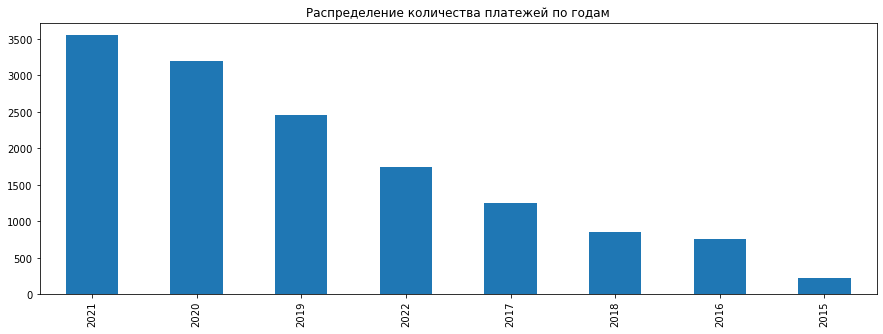

In [13]:
# добавим столбцы с годом, месяцем, датой, номером дня недели платежа
df['day'] = df['date'].dt.day
#df['weekday'] = df['date'].dt.weekday
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['day_of_week'] = df['date'].dt.day_of_week
#удалим столбец с датой
#df = df.drop('date',axis=1)

# количество платежей по годам
df['year'].value_counts().plot(title='Распределение количества платежей по годам', kind='bar', figsize=(15,5))

**Вывод:**  В нашем распоряжении информация о 14043 пожертвований<br>
 Уникальных пользователей (ID): 3683 <br>
 Удалены дубликаты.<br>
 Пропуски заменены нулями.<br>
 Категорезированы назначения пожертвований.<br>
 Большое количество пожертвований наблюдается начиная с 2019 года. Целесообразно взять этот период для дальнейшей работы. <br>


## Исследуем пользователей, совершивших повторные пожертвования

### Выделим в отдельный датасет

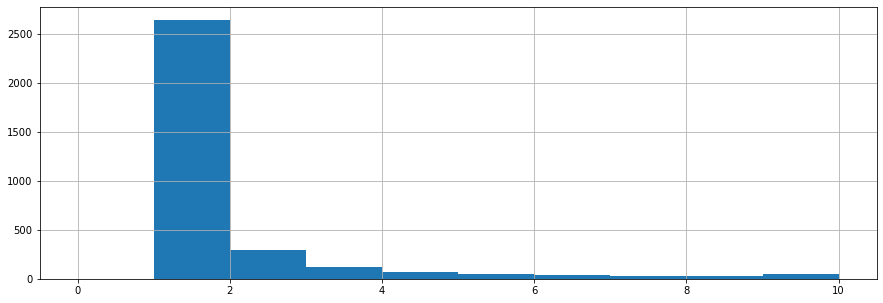

In [14]:
# Сохраним информацию о пользователях, совершивших более одного платежа, в отдельный датасет
# 1. Вычислим количество платежей от одинаковых ID
df1 = df.groupby('id')['id'].count().sort_values(ascending=False)
df1.hist(figsize=(15,5), range=(0,10), bins=10);

**Вывод:**  Среди всех пользователей значительно преобладают жертвователи, совершившие два платежа.<br>

In [15]:
# 2. вычислим количество пользователей, совершивших более одного платежа
(df1>1).sum()

1039

In [16]:
# 3. сохраним ID этих пользователей
repeat = df['id'].value_counts().head(1039).index.tolist()
# 4. сохраним всю информацию о платежах от этих пользователей в датасет
df1 = df[df['id'].isin(repeat)]

df1.head()

,id,date,amount,is_reccurent,purpose,channel,gender,city,last_email_activity,day,month,year,day_of_week
0,DE5393F9-9585-4057-B7FB-24B69697FC08,2022-07-03 19:49:48,300.0,1,пожертвование undefined,Банковские карты,Женский,Москва,2022-06-03 20:15:57,3,7,2022,6
1,81CD4BEF-443E-4D36-B34F-664E11182D65,2020-03-14 12:20:02,300.0,0,sms bdd,SMS,Женский,Москва,2022-07-18 17:19:02,14,3,2020,5
2,D3BEB76D-D8B6-47E2-8109-44F1B278943B,2022-04-07 00:00:00,16.0,0,добровольное пожертвование. ндс не облагается,Прямые поступления на счет,Мужской,0,0,7,4,2022,3
4,61C3D86B-39DA-445C-9D7F-9924CE9BDA14,2021-06-26 01:26:07,200.0,1,пожертвование undefined,Банковские карты,Женский,0,2022-07-20 20:32:37,26,6,2021,5
5,6FDEE73B-0270-4AFA-BA21-579E5B970D6A,2017-08-26 18:16:27,100.0,1,пожертвование в фонд помощи детям-отказникам и...,Банковские карты,Женский,0,2022-07-18 16:29:38,26,8,2017,5


## Исследуем и категоризируем данные о постоянных жертвователях

In [17]:
# количество пожертвований от постоянных жертвователей
df1['id'].count()

11387

In [18]:
# среднее количество пожертвований от постоянных жертвователей за все время
df1['id'].count()/len(df1['id'].unique())

10.959576515880654

In [19]:
# доля рекуррентных платежей
(df1[df1['is_reccurent'] == 1]['id'].count()/len(df1['id']))

0.7083516290506718

###  Каналы платежей

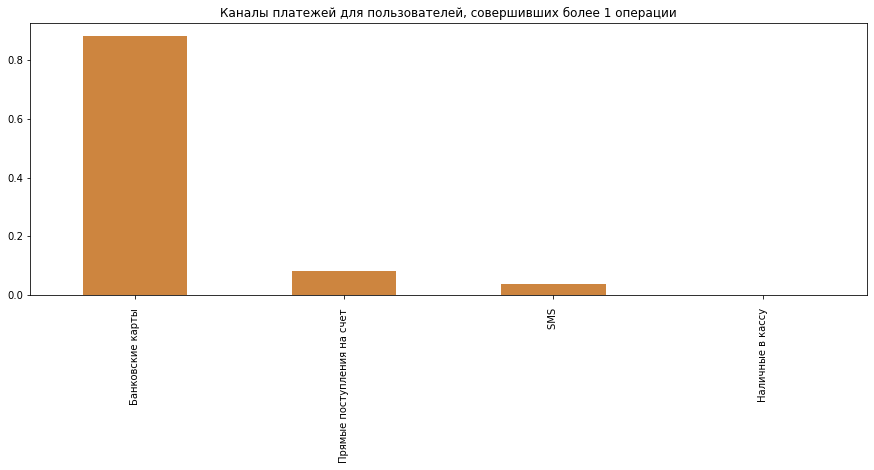

In [20]:
# доля платежей из разных каналов для повторных пожертвований
(df1['channel'].value_counts()/len(df1['id'])).plot(
    title='Каналы платежей для пользователей, совершивших более 1 операции',
    kind='bar', 
    figsize=(15,5),
    color='peru'
);

In [21]:
(df1['channel'].value_counts()/len(df1['id'])).to_frame()

,channel
Банковские карты,0.881532
Прямые поступления на счет,0.082023
SMS,0.036182
Наличные в кассу,0.000263


###  Города постоянных жертвователей

In [22]:
# количество городов в датасете
len(df1['city'].unique())

120

In [23]:
# топ городов по количеству постоянных жертвователей

(df1['city'].value_counts()/len(df1['id'])).head(20)

0                    0.452270
Москва               0.303065
Санкт-Петербург      0.039782
Краснодар            0.018530
Якутск               0.011329
Мытищи               0.008167
Екатеринбург         0.007728
Самара               0.007640
Frankfurt am Main    0.007289
Изобильный           0.006674
Сочи                 0.006586
Ростов-на-Дону       0.006586
Одинцово             0.006147
Нижний Новгород      0.005884
Брянск               0.004742
Воронеж              0.004391
Charleston           0.004303
Казань               0.004128
Владивосток          0.003513
Ставрополь           0.003425
Name: city, dtype: float64

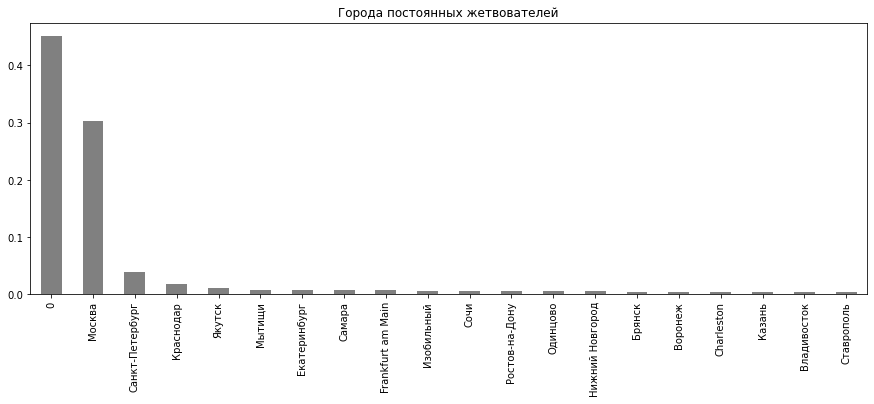

In [24]:
(df1['city'].value_counts()/len(df1['id'])).head(20).plot(
    title='Города постоянных жетвователей',
    kind='bar', 
    figsize=(15,5),
    color='gray'
);

In [25]:
# Напишем функцию для категоризации городов

def city_category(city):
    foreign_cities = ['Frankfurt am Main', 'Charleston', 'Helsinki', 'Juba', 'Copenhagen', 'Holon', 
                     'Hyderabad', 'Alameda', 'Jakarta', 'Keighley', 'Southall', 'Denver']
    
    if city.loc['city'] == 'Москва':
        return 'Москва'
    elif city.loc['city'] == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    elif city.loc['city'] in foreign_cities:
        return 'Зарубежные страны'
    elif city.loc['city'] == '0':
        return 'Город неизвестен'
    else:
        return 'Другие города России'

df1['city'] = df1['city'].fillna(0)
# применим функцию
df1['city_category'] = df1.apply(city_category, axis=1)
# удалим столбец 'city'
df1 = df1.drop('city',axis=1)

df1.head()

,id,date,amount,is_reccurent,purpose,channel,gender,last_email_activity,day,month,year,day_of_week,city_category
0,DE5393F9-9585-4057-B7FB-24B69697FC08,2022-07-03 19:49:48,300.0,1,пожертвование undefined,Банковские карты,Женский,2022-06-03 20:15:57,3,7,2022,6,Москва
1,81CD4BEF-443E-4D36-B34F-664E11182D65,2020-03-14 12:20:02,300.0,0,sms bdd,SMS,Женский,2022-07-18 17:19:02,14,3,2020,5,Москва
2,D3BEB76D-D8B6-47E2-8109-44F1B278943B,2022-04-07 00:00:00,16.0,0,добровольное пожертвование. ндс не облагается,Прямые поступления на счет,Мужской,0,7,4,2022,3,Город неизвестен
4,61C3D86B-39DA-445C-9D7F-9924CE9BDA14,2021-06-26 01:26:07,200.0,1,пожертвование undefined,Банковские карты,Женский,2022-07-20 20:32:37,26,6,2021,5,Город неизвестен
5,6FDEE73B-0270-4AFA-BA21-579E5B970D6A,2017-08-26 18:16:27,100.0,1,пожертвование в фонд помощи детям-отказникам и...,Банковские карты,Женский,2022-07-18 16:29:38,26,8,2017,5,Город неизвестен


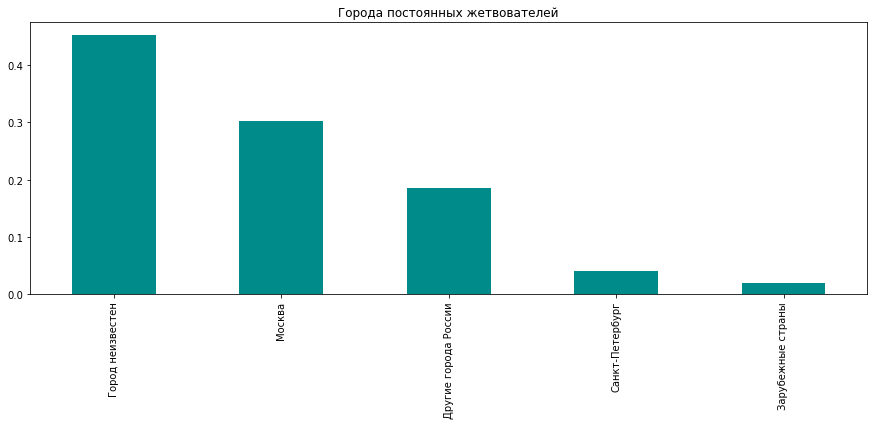

In [26]:
(df1['city_category'].value_counts()/len(df1['id'])).head(20).plot(
    title='Города постоянных жетвователей',
    kind='bar', 
    figsize=(15,5),
    color='darkcyan'
);

### Назначения пожертвований

In [27]:
# назначение пожертвования
# количество уникальных назначений
len(df['purpose'].unique())

880

<AxesSubplot:>

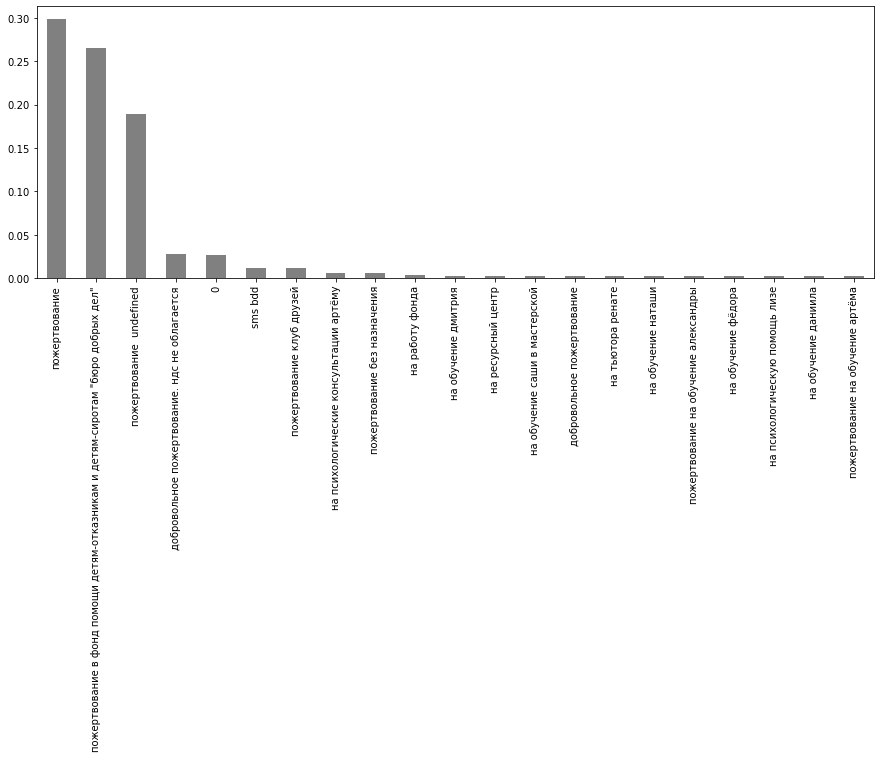

In [28]:
# доли назначений платежей
(df1['purpose'].value_counts()/len(df1['id'])).head(21).plot(kind='bar',figsize=(15,5), color='gray')

In [29]:
# доля назначений пожертвований
((df1['purpose'].value_counts()/len(df1['id'])).head(21)).to_frame()

,purpose
пожертвование,0.298235
"пожертвование в фонд помощи детям-отказникам и детям-сиротам ""бюро добрых дел""",0.265742
пожертвование undefined,0.189514
добровольное пожертвование. ндс не облагается,0.027400
0,0.026961
sms bdd,0.012295
пожертвование клуб друзей,0.011153
на психологические консультации артёму,0.006499
пожертвование без назначения,0.005796
на работу фонда,0.003161


In [30]:
# изменим тип данных в столбце 'purpose' на object
df1['purpose'] = df1['purpose'].astype('object')

In [31]:
# Напишем функцию для категоризации назначений платежей

def purose_category(purpose):
    
    if ('окно в мир' or 'история успеха' or 'на обучение' or 'на тьютора' or 'на психологическую помощь') in purpose.loc['purpose']:
        return 'именное пожертвование'
    elif 'sms' in purpose.loc['purpose']:
        return 'sms'
    elif 'клуб друзей' in purpose.loc['purpose']:
        return 'пожертвование'
    elif '0' in purpose.loc['purpose']:
        return 'назнчение не указано'
    else:
        return 'пожертвование'

# применим функцию
df1['purpose_category'] = df1.apply(purose_category, axis=1)
# удалим столбец 'purpose'
df1 = df1.drop('purpose',axis=1)

df1.head()

,id,date,amount,is_reccurent,channel,gender,last_email_activity,day,month,year,day_of_week,city_category,purpose_category
0,DE5393F9-9585-4057-B7FB-24B69697FC08,2022-07-03 19:49:48,300.0,1,Банковские карты,Женский,2022-06-03 20:15:57,3,7,2022,6,Москва,пожертвование
1,81CD4BEF-443E-4D36-B34F-664E11182D65,2020-03-14 12:20:02,300.0,0,SMS,Женский,2022-07-18 17:19:02,14,3,2020,5,Москва,sms
2,D3BEB76D-D8B6-47E2-8109-44F1B278943B,2022-04-07 00:00:00,16.0,0,Прямые поступления на счет,Мужской,0,7,4,2022,3,Город неизвестен,пожертвование
4,61C3D86B-39DA-445C-9D7F-9924CE9BDA14,2021-06-26 01:26:07,200.0,1,Банковские карты,Женский,2022-07-20 20:32:37,26,6,2021,5,Город неизвестен,пожертвование
5,6FDEE73B-0270-4AFA-BA21-579E5B970D6A,2017-08-26 18:16:27,100.0,1,Банковские карты,Женский,2022-07-18 16:29:38,26,8,2017,5,Город неизвестен,пожертвование


<AxesSubplot:title={'center':'Назначения платежей для постоянных жертвователей'}>

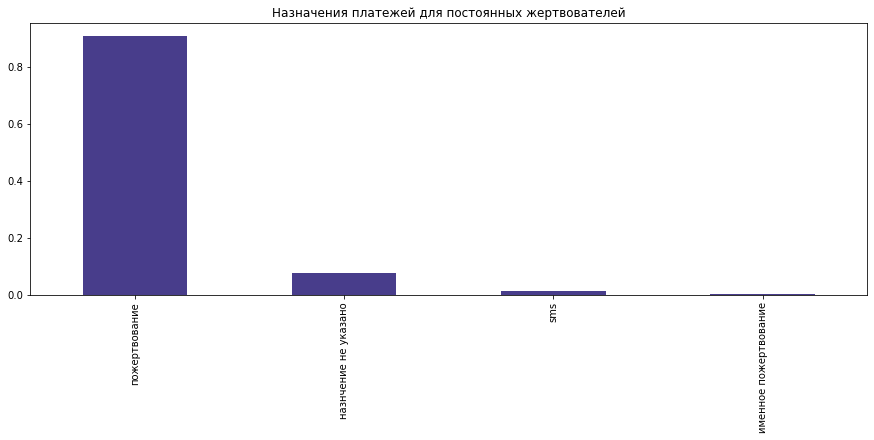

In [32]:
# Назначения платежей
(df1['purpose_category'].value_counts()/len(df1['id'])).head(21).plot(title='Назначения платежей для постоянных жертвователей', kind='bar',figsize=(15,5), color='darkslateblue')

In [33]:
(df1['purpose_category'].value_counts()/len(df1['id'])).to_frame()

,purpose_category
пожертвование,0.909809
назнчение не указано,0.074647
sms,0.012295
именное пожертвование,0.003249


**Вывод:**  Более 90% составляют пожертвования на общие цели.<br>
Именные пожертвования составляют околок 0,3%.

**Размеры пожертвований**

<AxesSubplot:>

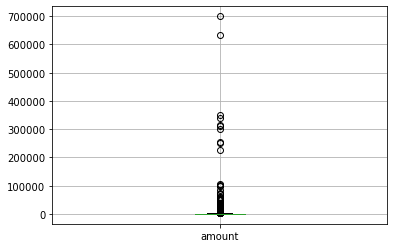

In [34]:
df1.boxplot('amount')

In [35]:
df1['amount'].describe().to_frame()

,amount
count,11387.000000
mean,1322.645681
std,12322.238442
min,0.160000
25%,200.000000
50%,500.000000
75%,1000.000000
max,700000.000000


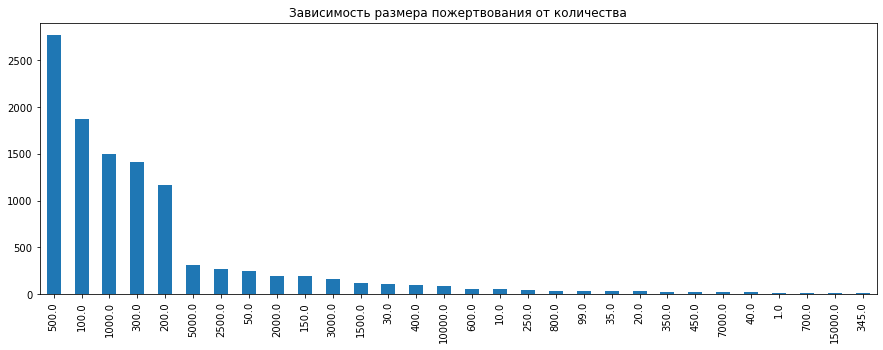

In [36]:
# размеры пожертвований
df1['amount'].value_counts().head(30).plot(title='Зависимость размера пожертвования от количества', kind='bar',figsize=(15,5));

**Вывод:**  Чаще всего жертвуют 500, 100, 1000, 300 или 200 руб.

In [37]:
# удалим пожертвования, сумма которых менее 10 рублей
print('Доля удаленных значений: ', df1[df1['amount']<10]['id'].count()/len(df1['id']))
df1 = df1[df1['amount']>=10]

Доля удаленных значений:  0.004742249934135418


In [38]:
# максимальная сумма рекуррентных платежей -- 10 000 руб
print(df1[(df1['amount']>=10000)&(df['is_reccurent']==1)]['id'].count())
df1[(df1['amount']>=10000)&(df['is_reccurent']==1)].head()

57


,id,date,amount,is_reccurent,channel,gender,last_email_activity,day,month,year,day_of_week,city_category,purpose_category
116,2AA1C086-BF4C-4A5B-9237-FCB7BAB3B038,2019-03-28 16:20:08,10000.0,1,Банковские карты,Женский,2022-07-20 01:16:23,28,3,2019,3,Москва,пожертвование
163,674584A9-FF35-463B-A607-DBB2A7B7891F,2016-11-14 08:35:09,10000.0,1,Банковские карты,Женский,2020-04-15 22:04:54,14,11,2016,0,Город неизвестен,пожертвование
206,2AA1C086-BF4C-4A5B-9237-FCB7BAB3B038,2019-12-28 16:19:46,10000.0,1,Банковские карты,Женский,2022-07-20 01:16:23,28,12,2019,5,Москва,пожертвование
289,2AA1C086-BF4C-4A5B-9237-FCB7BAB3B038,2021-11-01 16:33:55,10000.0,1,Банковские карты,Женский,2022-07-20 01:16:23,1,11,2021,0,Москва,пожертвование
309,2AA1C086-BF4C-4A5B-9237-FCB7BAB3B038,2019-08-28 16:19:56,10000.0,1,Банковские карты,Женский,2022-07-20 01:16:23,28,8,2019,2,Москва,пожертвование


**Вывод:** Максимальная сумма рекуррентных платежей -- 10 000 руб.<br>
Количество платежей за все время: 57.<br>
Все платежи, город которых известен, совершены из Москвы.

Количество удаленных значений:  24
Доля удаленных значений:  0.002117709344392482


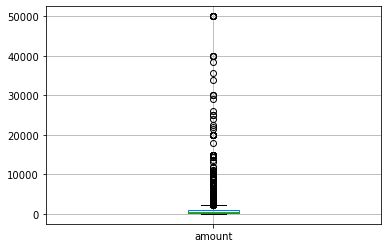

In [39]:
# удалим суммы пожертвований более 50 000 руб
print('Количество удаленных значений: ', (df1[df1['amount']>50000])['id'].count())
print('Доля удаленных значений: ', (df1[df1['amount']>50000])['id'].count()/len(df1['id']))
df1 = df1[df1['amount']<=50000]
df1.boxplot('amount');

### Отдельный датасет с информацией о каждом жертвователе, совершившим более одного пожертвования и родолжительность пожертвований (lifetime)

In [43]:
# сформируем отдельный датасет с информацией о каждом жертвователе

df_id = df1.groupby('id').agg(
    {'date': ['min', 'max'], 'amount':['count', 'sum', 'mean', 'median']}).set_axis(
    ['first_date', 'last_date','donations_count','donations_sum', 'donations_mean', 'donations_median'], 
    axis=1, inplace=False).reset_index()

# вычислим lifetime каждого жертвователя в днях
df_id['lifetime'] = (df_id['last_date']-df_id['first_date'])/np.timedelta64(1,'D')
df_id['lifetime'] = df_id['lifetime'].astype(float).apply(np.floor)

# вычислим частоту пожертвований
#df_id['frequence'] = df_id['donations_count']/df_id['lifetime']
# вычислим, через какое время (в днях) в среднем совершается пожертвование (среднее значение периода пожертвований)
df_id['period'] = df_id['lifetime']/df_id['donations_count']

# добавим количество дней, прошедшее с последнего пожертвования
df_id['last_donations'] = (pd.Timestamp('today') - df_id['last_date'])/np.timedelta64(1,'D')

df_id

,id,first_date,last_date,donations_count,donations_sum,donations_mean,donations_median,lifetime,period,last_donations
0,000711B2-2785-461B-BF5B-5CB7D2CABA20,2020-03-27 08:23:58,2022-06-27 08:24:05,21,10500.0,500.000000,500.0,822.0,39.142857,40.502973
1,0015A100-2D8C-4262-A9B3-BB1461C0C8B8,2021-07-27 12:15:05,2021-07-27 12:17:06,2,400.0,200.000000,200.0,0.0,0.000000,375.341156
2,00ADBA34-1EDC-4652-A559-1C0BE379A0DA,2019-09-10 10:34:52,2022-04-13 11:36:54,4,1600.0,400.000000,400.0,946.0,236.500000,115.369073
3,00B01874-B85A-4E15-8888-F38CB255FA76,2020-04-26 17:32:44,2020-11-26 17:32:57,7,700.0,100.000000,100.0,214.0,30.571429,618.121816
4,013339E3-2CA6-4BED-9EFE-37B65E0D4106,2019-06-06 20:28:04,2020-03-03 16:27:26,4,950.0,237.500000,250.0,270.0,67.500000,886.167314
...,...,...,...,...,...,...,...,...,...,...
1030,FEE4BAD2-DE40-4FE6-8515-6C579A28DDA1,2019-07-17 13:02:05,2021-12-17 13:02:41,30,15000.0,500.000000,500.0,884.0,29.466667,232.309501
1031,FEE7B479-DFEC-489D-8490-D6FC04BD7860,2020-04-02 09:49:55,2022-07-02 09:50:12,38,4300.0,113.157895,100.0,821.0,21.605263,35.443170
1032,FF331E7F-F975-46E4-9754-A13B661EF5C5,2019-09-13 15:21:52,2021-07-15 00:34:31,2,2000.0,1000.000000,1000.0,670.0,335.000000,387.829061
1033,FFA30123-A516-44A7-B030-F83ED369B645,2020-03-27 19:55:41,2022-07-04 13:32:33,27,4100.0,151.851852,200.0,828.0,30.666667,33.288760


In [41]:
df_id.describe()

,donations_count,donations_sum,donations_mean,donations_median,lifetime,period,last_donations
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000
mean,10.926570,9984.228522,1236.283529,1141.290585,460.533333,62.480057,633.568001
std,12.124213,24405.751659,3487.667603,3315.389953,474.925737,99.711523,612.806499
min,1.000000,10.000000,10.000000,10.000000,0.000000,0.000000,9.045911
25%,2.000000,900.000000,200.000000,200.000000,86.000000,23.583333,98.960002
50%,5.000000,2900.000000,442.857143,450.000000,334.000000,30.285714,496.910078
75%,16.000000,9000.000000,985.294118,1000.000000,699.000000,58.916667,955.983041
max,83.000000,398000.000000,50000.000000,50000.000000,2486.000000,823.500000,2575.002149


In [42]:
df_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1035 non-null   object        
 1   first_date        1035 non-null   datetime64[ns]
 2   last_date         1035 non-null   datetime64[ns]
 3   donations_count   1035 non-null   int64         
 4   donations_sum     1035 non-null   float64       
 5   donations_mean    1035 non-null   float64       
 6   donations_median  1035 non-null   float64       
 7   lifetime          1035 non-null   float64       
 8   period            1035 non-null   float64       
 9   last_donations    1035 non-null   float64       
dtypes: datetime64[ns](2), float64(6), int64(1), object(1)
memory usage: 81.0+ KB
